In [1]:
import os
import pandas as pd
import numpy as np
from cv2 import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
feather_dict = {
    'wiki': 'wiki_crop',
    'imdb': 'imdb',
    'utk': 'UTKFace',
    'cacd': 'cacd.feather',
    'facial': 'facial-age.feather',
    'asia': 'All-Age-Faces',
    'afad': 'AFAD-Full'
}

In [3]:
'''
    input:  row: a row of data, containt encoded image information
            type: depend on which type of training, using just a original img or combine with 3 neighbor imgs
    output: an images list with decoded image information
'''
def image_decode(row, type='ori'):
    row = row[1]
    if type == 'ori':
        images_list = [row.img_ori]
    else:
        images_list = [row.img_box1, row.img_box2, row.img_box3]

    for idx, img in enumerate(images_list):
        img = np.frombuffer(img, np.uint8)
        img = cv2.imdecode(img, cv2.IMREAD_COLOR)
        images_list[idx] = img

    return images_list

In [4]:
'''
    input:  data_path: the folder that contants all avaiable data folder in *.feather
            source: which data will be used
    output: a dataframe which a combination of data in all sources 
'''
def load_data_all(data_path, source):
    source = source.split('|')
    init_df = True
    dataframe = pd.DataFrame()

    for s in source:
        feather_folder = feather_dict[s]
        feather_path = os.path.join(data_path, feather_folder)

        all_feather_files = os.listdir(feather_path)

        for feather in all_feather_files:

            feather_dir = os.path.join(feather_path, feather)
            loaded_data = pd.read_feather(feather_dir)

            # For first dataframe loaded
            if init_df:
                dataframe = loaded_data
                init_df = False
            else:
                dataframe = pd.concat([dataframe, loaded_data], ignore_index=True, sort=False)

            print(loaded_data.shape)
            print(feather_dir)
    print(dataframe.shape)

    # Filter
    dataframe = dataframe[(dataframe['age'] > 0) & (dataframe['age'] < 101)]
    dataframe = dataframe.dropna()

    return dataframe

## Change this to plot different dataset analysis

In [9]:
data = load_data_all("D:\\Dataset\\Feather", "imdb")

(8081, 6)
D:\Dataset\Feather\imdb\imdb_crop.feather
(38382, 6)
D:\Dataset\Feather\imdb\imdb_crop_100000.feather
(38706, 6)
D:\Dataset\Feather\imdb\imdb_crop_150000.feather
(38784, 6)
D:\Dataset\Feather\imdb\imdb_crop_200000.feather
(37283, 6)
D:\Dataset\Feather\imdb\imdb_crop_250000.feather
(37383, 6)
D:\Dataset\Feather\imdb\imdb_crop_300000.feather
(37136, 6)
D:\Dataset\Feather\imdb\imdb_crop_350000.feather
(37253, 6)
D:\Dataset\Feather\imdb\imdb_crop_400000.feather
(37054, 6)
D:\Dataset\Feather\imdb\imdb_crop_450000.feather
(38188, 6)
D:\Dataset\Feather\imdb\imdb_crop_50000.feather
(348250, 6)


In [10]:
def plot_count(idx, value):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(idx, value)
    plt.show()

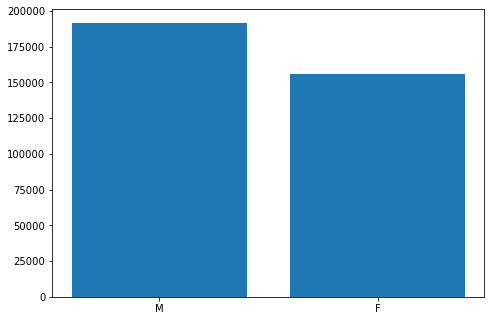

In [11]:
gen = data['gen'].value_counts().to_frame()
idx = ["M", "F"]
value = gen.gen
plot_count(idx, value)

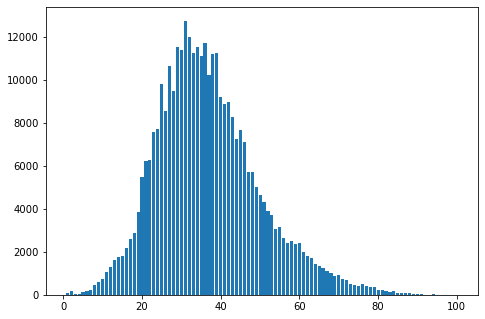

In [12]:
age = data['age'].value_counts().to_frame().sort_index()
idx = age.index
value = age.age
plot_count(idx, value)

In [111]:
age = 10
gap = 20
print(age)

10


In [122]:
a = np.zeros(shape=[100])

min_age = age - gap
max_age = age + gap

print(min_age, max_age)

# ls_min = np.logspace(0, 0.99, num=gap)/10
# ls_max = np.logspace(0.99, 0, num=gap)/10

ls_min = np.linspace(0, 0.99, num=gap)
ls_max = np.linspace(0.99, 0, num=gap)

print(ls_min[-min_age:])
print(a[0:age])

if min_age <= 0:
    a[0:age] = ls_min[-min_age:]
    a[age:max_age] = ls_max
elif max_age >= 100:
    a[min_age+1:age+1] = ls_min
    a[age:101] = ls_max[:max_age-100+1]

print(ls_min, ls_max)

-10 30
[0.52105263 0.57315789 0.62526316 0.67736842 0.72947368 0.78157895
 0.83368421 0.88578947 0.93789474 0.99      ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.05210526 0.10421053 0.15631579 0.20842105 0.26052632
 0.31263158 0.36473684 0.41684211 0.46894737 0.52105263 0.57315789
 0.62526316 0.67736842 0.72947368 0.78157895 0.83368421 0.88578947
 0.93789474 0.99      ] [0.99       0.93789474 0.88578947 0.83368421 0.78157895 0.72947368
 0.67736842 0.62526316 0.57315789 0.52105263 0.46894737 0.41684211
 0.36473684 0.31263158 0.26052632 0.20842105 0.15631579 0.10421053
 0.05210526 0.        ]


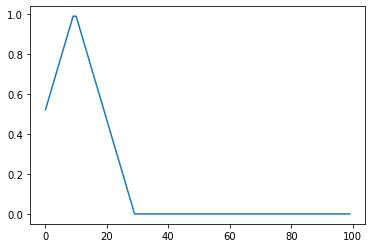

In [121]:
plt.plot(a)

In [96]:
a[age-2], a[age-1], a[age], a[age+1], a[age+2]

(7.687576910006674,
 8.667517692753204,
 9.772372209558107,
 8.667517692753202,
 7.687576910006673)

In [99]:
a

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1       , 0.11274707, 0.12711902, 0.14332297, 0.16159245,
       0.18219075, 0.20541473, 0.23159909, 0.26112118, 0.29440648,
       0.33193468, 0.37424663, 0.42195211, 0.47573863, 0.53638137,
       0.60475428, 0.68184272, 0.76875769, 0.86675177, 0.97723722,
       0.86675177, 0.76875769, 0.68184272, 0.60475428, 0.53638137,
       0.47573863, 0.42195211, 0.37424663, 0.33193468, 0.29440648,
       0.26112118, 0.23159909, 0.20541473, 0.18219075, 0.16159245,
       0.14332297, 0.12711902, 0.11274707, 0.1       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [124]:
2/3

0.6666666666666666